**Dataset**:

We will dive into a basic text-based sentiment classification task. The dataset consists of sentences with two different kinds of sentiments- `positive`, and `negative` sentiments. Following are a set of examples,

* **`positive`**: *I really like your new haircut!*
* **`negative`**: *Your new haircut is awful!*

The Dataset has a training set (`train_data.csv`- provided), a validation set (`val_data.csv`- provided) and a blind test set (`test_data.csv`- not provided). The notebook uses a `test_data.csv` file, but it is just a duplicate of `val_data.csv`, and the blind `test_data.csv` will replace it while grading your solutions.

**Important**: Fix seed as 42 whenever performing any randomized operations, e.g., initializing ML models.


### Download the dataset required for the assignment

In [1]:
# download train data
!wget -O train_data.csv "https://docs.google.com/spreadsheets/d/176-KrOP8nhLpoW91UnrOY9oq_-I0XYNKS1zmqIErFsA/gviz/tq?tqx=out:csv&sheet=train_data.csv"

# download validation data
!wget -O val_data.csv "https://docs.google.com/spreadsheets/d/1YxjoAbatow3F5lbPEODToa8-YWvJoTY0aABS9zaXk-c/gviz/tq?tqx=out:csv&sheet=val_data.csv"

# download test data
!wget -O test_data.csv "https://docs.google.com/spreadsheets/d/1YxjoAbatow3F5lbPEODToa8-YWvJoTY0aABS9zaXk-c/gviz/tq?tqx=out:csv&sheet=val_data.csv"

--2024-09-23 22:32:05--  https://docs.google.com/spreadsheets/d/176-KrOP8nhLpoW91UnrOY9oq_-I0XYNKS1zmqIErFsA/gviz/tq?tqx=out:csv&sheet=train_data.csv
Resolving docs.google.com (docs.google.com)... 142.250.77.46, 2404:6800:4009:832::200e
Connecting to docs.google.com (docs.google.com)|142.250.77.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘train_data.csv’

train_data.csv          [         <=>        ]  15.12M  7.68MB/s    in 2.0s    

2024-09-23 22:32:09 (7.68 MB/s) - ‘train_data.csv’ saved [15851033]

--2024-09-23 22:32:11--  https://docs.google.com/spreadsheets/d/1YxjoAbatow3F5lbPEODToa8-YWvJoTY0aABS9zaXk-c/gviz/tq?tqx=out:csv&sheet=val_data.csv
Resolving docs.google.com (docs.google.com)... 142.250.77.46, 2404:6800:4009:832::200e
Connecting to docs.google.com (docs.google.com)|142.250.77.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘val_data.csv’

val_

In [2]:
#@title Read data
import numpy as np
import pandas as pd

df = pd.read_csv('train_data.csv')
df_val = pd.read_csv('val_data.csv')

# Note that we will change the test file
# when we grade assignments  ...
# For now it is the same as the validation set
df_test = pd.read_csv('test_data.csv')

df.head()

,review,sentiment
0,I've watched this documentary twice - and alth...,positive
1,This is probably the worst movie I've seen in ...,negative
2,Superb story of a dedicated young teacher who ...,positive
3,<br /><br />Spoilers<br /><br />I'm going to b...,negative
4,"What can be said, really... ""The Tenant"" is a ...",positive


In [3]:
#@title Prepare training, validation and test data.

X_train, y_train = df.review.values.tolist(), df.sentiment.values.tolist()
X_val, y_val = df_val.review.values.tolist(), df_val.sentiment.values.tolist()
X_test, y_test = df_test.review.values.tolist(), df_test.sentiment.values.tolist()

labels = ['negative', 'positive']

# converting the sentiment labels into labels
# class 0 for negagtive, and class 1 for positive
y_train = [labels.index(i) for i in y_train]
y_val = [labels.index(i) for i in y_val]
y_test = [labels.index(i) for i in y_test]

In [4]:
import re
from bs4 import BeautifulSoup


english_stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
                      'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
                      'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was',
                      'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or',
                      'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
                      'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once',
                      'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
                      'only', 'own', 'same', 'so', 'than', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now',
                      'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't",
                      'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't",
                      'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


def remove_html(text):
    bs = BeautifulSoup(text, "html.parser")
    return ' ' + bs.get_text(separator=' ') + ' '

def keep_only_letters(text):
    text=re.sub(r'[^a-zA-Z_\s]','',text)
    return text

def convert_to_lowercase(text):
    return text.lower()

def decontracted(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

def handle_negation(text):
    words = text.split()
    negation_words = ["not", "no", "never", "none", "neither", "nor"]
    negated_words = []
    negate = False
    w = ''
    for word in words:
        if word in negation_words:
            negate = True
            w = word
        else:
            if negate:
              negated_words.append(w + '_' + word)
            else:
              negated_words.append(word)

            negate = False
            w = ''

    return ' '.join(negated_words)

def handle_positive(text):
    words = text.split()
    positive_words = ['too', 'very','extreamly']
    positive_words = []
    pos = False
    w = ''
    for word in words:
        if word in positive_words:
            pos = True
            w = word
        else:
            if pos:
              positive_words.append(w + '_' + word)
            else:
              positive_words.append(word)

            pos = False
            w = ''

    return ' '.join(positive_words)

def clean_reviews(text):
    text = remove_html(text)
    text = convert_to_lowercase(text)
    text = decontracted(text)
    text = handle_negation(text)
    # text = handle_positive(text)
    text = keep_only_letters(text)
    return text


def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in english_stop_words])

In [5]:
# X = X.map(remove_stop_words)
X_train = [clean_reviews(x) for x in X_train]
X_test = [clean_reviews(x) for x in X_test]

/tmp/ipykernel_3027729/1845119926.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  bs = BeautifulSoup(text, "html.parser")


In [6]:
for i in range(len(X_train)):
  X_train[i] = remove_stop_words(X_train[i])
for i in range(len(X_test)):
  X_test[i] = remove_stop_words(X_test[i])

#### Approach 1: Rule based classification

The rule-based classification works using a few hand-crafted rules. In sentiment classification, few words are associated with positive sentiment and few others with negative sentiment. Let's attempt to build a classifier that predicts the sentiment of the reviews based on such words.

Let's first write a few rules to extract important features about the input movie review. As an example, we provide a function that counts the number of `good` and `bad` words in the input.

Below, you can see a sample rule-based classification system. Later, you will be building one yourself.

In [7]:
def sample_extract_features(X):
    """
    Extracts features from a text input.

    Args:
        X (string): Text input.

    Returns:
        dictionary: features extracted from X.
    """

    features = {}
    X_split = X.split(' ')

    # Count the number of "good words" and "bad words" in the text
    good_words = ['love', 'good', 'brilliant', 'fantastic', 'amazing', 'great']
    bad_words = ['hate', 'bad', 'horrible', 'awful', 'terrible', 'mess', 'frustating', 'frustatingly']

    features['good_word_count'], features['bad_word_count'] = 0, 0
    for x in X_split:
        if x in good_words:
            features['good_word_count'] = features.get('good_word_count', 0) + 1
        if x in bad_words:
            features['bad_word_count'] = features.get('bad_word_count', 0) + 1

    # The "bias" value can be set to one, to allow us to assign a "default" score to the text
    features['bias'] = 1
    return features

In [8]:
def sample_predict(X, feature_weights):
    """
    Classifies the sentiment of a text input.

    Args:
        X (string): Text input.
        feature_weights: weightage of different features.

    Returns:
        int: binary sentiment represented by 0/1.
    """

    score = 0

    # Here we just multiply the feature value
    # with its corresponding weight and aggregate
    for feat_name, feat_value in sample_extract_features(X).items():
        score = score + feat_value * feature_weights[feat_name]

    # the prediction is based on whether the aggregated score is above 0 or not
    if score > 0:
        return 1
    else:
        return 0

In [9]:
def get_sample_features_weights():
  """
    To obtain feature weightage for different features.

    Args:
        None here.

    Returns:
        dictionary: feature names and their weightage.
    """
  # Based on the selected features, you can manually assign them weights
  feature_weights = {'good_word_count': 1.0, 'bad_word_count': -1.0, 'bias': 0.5}
  return feature_weights

In [10]:
#@title Computing the accuracy of the system

def calculate_accuracy(Y_true, Y_pred):
    """
    Calculates accuracy of predictions given the ground truth.

    Args:
        Y_true (list): Ground truth labels.
        Y_pred (list): Predictions.

    Returns:
        float: Prediction accuracy in range [0.0-100.0].
    """
    correct = 0.0
    total = len(Y_true)

    # verify if we have the same number of predictions as labels
    assert len(Y_true) == len(Y_pred)

    # count the number of correct predictions
    for y_true, y_pred in zip(Y_true, Y_pred):
        if y_true == y_pred:
            correct += 1.0

    if total > 0:
        return 100. * correct / total

    # return 0 if there the total number of examples are zero
    return 0.0

In [11]:
#@title Putting the sample rule-based classifier together

# get the sample weights
sample_feature_weights = get_sample_features_weights()

predictions = []

# for each test example, make a prediction
for input_example in X_test:
    y = sample_predict(input_example, sample_feature_weights)
    predictions.append(y)

# compute and print the accuracy
print (calculate_accuracy(y_test, predictions))

63.95


As you can observe here, the model achieves about 60% accuracy (note that the performance of a random classifier would be close to 50%).

### Build your own rule-based classifier (10 marks)

Your have to write your own `extract_features`, `get_feature_weights` and `predict` functions for your rule-based classifier.

In [12]:
def extract_features(X):
    """
    Extracts features from a text input.

    Args:
        X (string): Text input.

    Returns:
        dictionary: features extracted from X.
    """
    features = {}
    features['bias'] = 1

    # ADD YOUR CODE HERE

    # please extract features that you think would be useful.

    X_split = X.split(' ')
    good_words = set(['beautiful', 'love', 'good', 'hold ', 'great','brilliant','fantastic',  'excellent', 'superb', 'outstanding', 'remarkable',
                      'splendid', 'terrific', 'awesome', 'wonderful','performances','liked', 'attention','enjoyed','highly','loved','favorite',
                      'amazing', 'marvelous',  'impressive', 'stellar', 'phenomenal','moments','hilarious','recommend','recommended','unique','kudos',
                      'extraordinary', 'perfect', 'superior','realistic', 'glorious', 'majestic', 'sublime', 'inspiring','entertaining','solid',
                      'spectacular', 'unbelievable', 'astounding', 'incredible', 'masterful', 'world','worth','enjoy','fine','enjoyable',
                      'top','notch', 'first','rate', 'exceptional', 'admirable', 'praise', 'fun','praiseworthy', 'best','commendable', 'splendiferous',
                      'grand', 'fabulous', 'divine', 'stunning', 'mind','blowing', 'captivating', 'delightful', 'joyful','wonderfully'
                      'enchanting', 'uplifting', 'captivating', 'stellar','exquisite', 'enthralling', 'charming', 'radiant', 'delicate',
                      'resplendent', 'jubilant', 'thrilling', 'ecstatic', 'gratifying', 'winsome', 'exhilarating', 'vibrant', 'serene', 'tranquil',
                      'enamored', 'gleaming', 'glowing', 'majestic', 'breathtaking'])

    bad_words = set(['hate','bad','dislike','mess', 'poor', 'atrocious','frustating','frustatingly', 'dreadful', 'abysmal', 'lousy', 'inferior', 'disappointment',
                     'horrible', 'awful', 'terrible', 'miserable', 'abominable', 'deplorable', 'pathetic', 'shameful','worst','worse','unfortunately','pointless',
                     'displeasing', 'unpleasant', 'unsatisfactory', 'offensive', 'not_even', 'objectionable', 'disgusting', 'revolting','not_worth','no_sense',
                     'vile', 'boring', 'repugnant', 'disappointed','gross', 'appalling', 'detestable', 'execrable', 'lame', 'lamentable','tedious','cheap',
                     'disheartening', 'heartbreaking', 'woeful', 'regrettable', 'pitiful', 'sad', 'depressing', 'tragic','problem','unfunny', 'mournful', 'gloomy',
                     'dismal', 'waste','wasted', 'bleak', 'despondent', 'repulsive', 'ugly', 'disastrous','nothing', 'stupid',  'annoying', 'dull', 'avoid', 'poorly',
                     'fails', 'disappointing', 'not_funny','vexing', 'frustrating', 'nauseating', 'banal', 'dreary', 'sullen', 'mundane', 'insipid', 'baneful',
                     'reprehensible', 'malevolent', 'detrimental', 'wretched', 'reproachful', 'loathsome', 'gruesome', 'ghastly', 'sorrowful', 'pitiable', 'bitter',
                     'despicable', 'unfortunate', 'heartrending', 'melancholy', 'distressing', 'anguished', 'dismaying', 'disconcerting', 'irksome', 'weary', 'tedious'])

    features['good_word_count'], features['bad_word_count'] = 0, 0
    for x in X_split:
        if x in good_words:
            features['good_word_count'] = features.get('good_word_count', 0) + 1
        if x in bad_words:
            features['bad_word_count'] = features.get('bad_word_count', 0) + 1

    return features

In [13]:
def get_feature_weights():
    """
    To obtain feature weightage for different features.

    Args:
        None here.

    Returns:
        dictionary: feature names and their weightage.
    """

    feature_weights = {}
    feature_weights['bias'] = 0.5

    # ADD YOUR CODE HERE

    # please manually assign feature weights to the features you've extracted
    feature_weights = {'good_word_count': 0.4, 'bad_word_count': -1.25, 'bias': -0.1}

    return feature_weights

In [14]:
def predict(X, feature_weights):
    """
    Classifies the sentiment of a text input.

    Args:
        X (string): Text input.
        feature_weights: weightage of different features.

    Returns:
        int: binary sentiment represented by 0/1.
    """

    # ADD YOUR CODE HERE

    score = 0
    # Here we just multiply the feature value
    # with its corresponding weight and aggregate
    for feat_name, feat_value in extract_features(X).items():
        score = score + feat_value * feature_weights[feat_name]

    # the prediction is based on whether the aggregated score is above 0 or not
    if score > 0:
        return 1
    else:
        return 0

In [15]:
#@title Evaluating your rule-based classifier

## Please do not change anything in this code block.

feature_weights = get_feature_weights()

predictions = []

for input_example in X_test:
    y = predict(input_example, feature_weights)
    predictions.append(y)

print (f"EVALUATION of rule-based classifier is: {calculate_accuracy(y_test, predictions)}")

EVALUATION of rule-based classifier is: 78.575


You will be evaluated based on the performance of your rule-based classifier. Please note that the sample rule-based classifier achieves about 60% accuracy. Anything below 60% will not yield any points.

***Please do not change the evaluation code in the block above, as it would be used to grade your classifier***.

Below, we will directly learn the feature weights, rather than manually assigning those ourselves as manual assignment can be error-prone and labor intensive.

In [16]:
#@title Learning the weights of extracted features using logistic regression.

from sklearn.linear_model import LogisticRegression

def get_sample_learnable_weights(X_data, Y_data, sample_extract_features):
    """
    Learn feature weights using the training data.

    Args:
        X_data (list of strings): All the text data points in training data.
        Y_data (list of int): Ground truth labels for text data points in X_data.
        sample_extract_features: A Function that extracts features from text sample.
                                 The sample_extract_features function should be of the
                                 same format as sample_extract_features(X) function
                                 implemented above.

        Returns:
            dictionary: feature names and their learned weights.
    """
    # training a logistic regression model for classification using
    # the features obtained by sample_extract_features(X) function.

    # get all feature names
    feature_names = list(sample_extract_features(X_data[0]).keys())

    # Below code snippet accumulates features extracted from all the
    # text data points in X_data.
    all_features = []
    # iterate over all text data points in X_data.
    for input_example in X_data:
      feature = [] # to store features extracted from input_example.
      feat_dict = sample_extract_features(input_example)
      # iterate over different feature names and store the corresonding values.
      for name in feature_names:
        feature.append(feat_dict[name])
      all_features.append(feature) # append features obtained from input_example to all_features.

    # Below, we show how to fit a logistic regression (LR) model using the features and the target labels.
    # We use Sklearn's 'LogisticRegression' to do this. While initiating, 'fit_intercept' is set False,
    # because 'bias' is already included in the extracted feature (see sample_extract_features() implementation).
    # Also, random state is set to 42 to avoid different initialization of the model while running the codebook
    # multiple times.
    clf = LogisticRegression(fit_intercept=False, random_state=42).fit(all_features, Y_data)

    # As training a logistic regression model assigns weights to each of the features (refer class notes),
    # these weights are learnable and we will use them as learned feature weights.

    # extract feature weights.
    coffs = clf.coef_[0]

    # convert to dictionary
    coffs_dict = {feature_names[i]: coffs[i] for i in range(len(feature_names))}

    return coffs_dict

In [17]:
#@title Putting the sample rule-based classifier with learnable weights together

# get the sample weights
sample_feature_weights_lr = get_sample_learnable_weights(X_train, y_train, sample_extract_features)

predictions = []

for input_example in X_test:
    y = sample_predict(input_example, sample_feature_weights_lr)
    predictions.append(y)

print (calculate_accuracy(y_test, predictions))

67.2


As you can observe here, the model achieves about 63% accuracy (note that the performance of a random classifier would be close to 50%). Note that, the performance significantly improves by making the weights learnable as compared to the manual weights.

## How does learnable weights-based classifier work on the features you implemented (3 marks)

Your don't have to write anything here except simply running the below kernel.
Depending upon the quality of your features, your classifier performance will vary.

In [18]:
#@title Evaluating your rule-based classifier with learnable weights.

## Please do not change anything in this code block.
feature_weights_lr = get_sample_learnable_weights(X_train, y_train, extract_features)

predictions = []

for input_example in X_test:
    y = predict(input_example, feature_weights_lr)
    predictions.append(y)

print (f"EVALUATION of rule-based classifier with learnable weights is: {calculate_accuracy(y_test, predictions)}")

EVALUATION of rule-based classifier with learnable weights is: 79.5


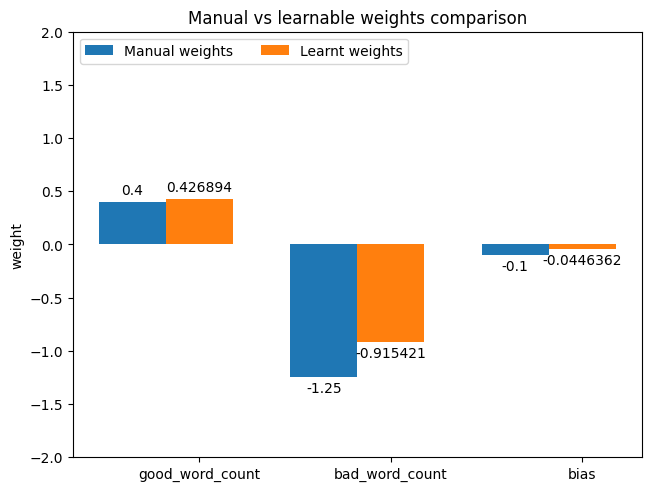

In [19]:
#@title Visualization and comparison between manual and learnable weights.

# visualize and compare the manual weights vs learnt weights.

import matplotlib.pyplot as plt
import numpy as np

feature_names = list(feature_weights.keys())
manual_weights = [feature_weights[name] for name in feature_names]
learnt_weights = [feature_weights_lr[name] for name in feature_names]
weights_dict = {
    'Manual weights': manual_weights,
    'Learnt weights': learnt_weights,
}

x = np.arange(len(feature_names))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in weights_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('weight')
ax.set_title('Manual vs learnable weights comparison')
ax.set_xticks(x + width, feature_names)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(-2, 2)

plt.savefig('manual_vs_learned_weights.png')
# Refer to the saved manual_vs_learned_weights.png to see how manual and learned weights compare.

### Approach 2: Bag-of-Words (BoW) (10 marks)

The BoW vector representations is based on the unordered counts of words piece of text (similar to a "bag" of words).

Let's attempt to build a classifier that tries to classify the reviews based on such vectors.

In [20]:
# implement your BoW classifier. In case the total number of words are very large,
# consider using top-k most frequent words (e.g. k=10,000) while creating BoW vectors.

# The below function finds out all words present in the corpus and assigns each word to
# an index.
from collections import Counter

def word_to_idx_BOW(X_data, K=10000):
    """
    Generates a set of word-index pairs after analyzing all words present in entire
    data corpus X_data.

    Args:
        X_data (list of strings): All the text data points in training data.
        K (int): The number of most frequent words to be considered.
                 In case (K-p)th to (K+q)th words in most frequent words order
                 have same frequency, you can choose p words randomly from those
                 (p+q) number of words.

        Returns:
            dictionary: words as keys and indices as values.
    """
    word_to_idx = {}
    # ADD YOUR CODE HERE

    # Step 1: Tokenize the text data into individual words
    words = [word for sentence in X_data for word in sentence.split()]

    # Step 2: Count the frequency of each word in the corpus
    word_freq = Counter(words)

    # Step 3: Select the top K most frequent words
    most_common_words = [word[0] for word in word_freq.most_common(K)]

    # Step 4: Assign indices to these selected words
    word_to_idx = {word: idx for idx, word in enumerate(most_common_words)}

    return word_to_idx

# generate BoW feature for text input X.
def extract_features_BoW(X, word_to_idx):
    """
    Generates BoW feature for X using word_to_idx.

    Args:
        X (string): text input.
        word_to_idx (dictionary): word-index mapping with words as keys and
                                  indices as values.

        Returns:
            dictionary: features of X.
    """
    features = {}
    # ADD YOUR CODE HERE
    word_counts = Counter(X.split())

    # Create a feature vector using the word indices
    features = {word_to_idx[word]: count for word, count in word_counts.items() if word in word_to_idx}

    return features

In [21]:
# checking the outputs of the above functions on a small set of examples

sample_data = [
    "When is the homework due ?",
    "When are the TAs' office hours ?",
    "How hard is the homework ?",
]
word_to_idx = word_to_idx_BOW(sample_data)
features = extract_features_BoW(sample_data[0], word_to_idx)
print(features)

{2: 1, 3: 1, 0: 1, 4: 1, 5: 1, 1: 1}


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

def get_learnable_weights_BoW(X_data, Y_data, word_to_idx_BOW, extract_features_BoW):
    """
    Learning feature weights for BoW features, using training data.

    Args:
        X_data (list of strings): All the text data points in training data.
        Y_data (list of int): Ground truth labels for text data points in X_data.
        word_to_idx_BOW: A Function that looks at all the words in data corpus X_data
                         and returns word-index mapping. You had to implement
                         word_to_idx_BOW() function above.
        extract_features_BoW: A Function that extracts BoW features from text sample.
                              The extract_features_BoW() function had to be implemented
                              by you above.

        Returns:
            dictionary: Feature indices and their learned weights.
    """

    # Step 1: Create BoW features for the entire training data
    word_to_idx = word_to_idx_BOW(X_data)
    X_features = [extract_features_BoW(sample, word_to_idx) for sample in X_data]

    X_final = []

    # Create an array of size 10000 initialized with 0
    # Update the array based on the dictionary values
    for x in X_features:
        array_size = 10000
        X_features_array = np.zeros(array_size)
        for key, value in x.items():
            if key < array_size:
                X_features_array[key] = value
        X_final.append(X_features_array)

    # Step 3: Initialize a logistic regression model
    model = LogisticRegression(C = 0.03, solver = 'lbfgs',penalty='l2')
    # model = LogisticRegression()

    # Step 4: Train the model on the BoW features and labels
    model.fit(X_final, Y_data)

    # Step 5: Extract learned weights and feature names
    learned_weights = model.coef_[0]

    # model = svm.SVC()

    # model.fit(X_final, Y_data)
    # learned_weights = model.coef_[0]

    feature_names = [idx for idx in range(len(learned_weights))]

    # Step 6: Create a dictionary with feature names and their learned weights
    weights_dict = {int(feature_names[i]): learned_weights[i] for i in range(len(feature_names))}

    return weights_dict


In [23]:
#@title Evaluating your BoW classifier

def predict(X, feature_weights, word_to_idx):
    """
    Classifies the sentiment of a text input.

    Args:
        X (string): Text input.
        feature_weights: Weightage of different features.

    Returns:
        int: Binary sentiment represented by 0/1.
    """
    # # Extract BoW features for the input text
    # features = extract_features_BoW(X, word_to_idx)

    # # Initialize the prediction score
    # score = 0.0

    # # Calculate the weighted sum of features using the learned weights
    # for idx, count in features.items():
    #     if idx in feature_weights:
    #         score += feature_weights[idx] * count

    # # Make a binary prediction based on the sign of the score
    # prediction = 1 if score > 0 else 0

    # return prediction


    # Extract BoW features from the input text
    features = extract_features_BoW(X, word_to_idx)

    # Calculate the weighted sum of features using learned feature weights
    weighted_sum = sum(feature_weights.get(idx, 0) * count for idx, count in features.items())

    # Apply a threshold (e.g., 0.0) to determine binary sentiment
    if weighted_sum > 0.0:
        return 1
    else:
        return 0

# get the sample weights
BoW_feature_weights_lr = get_learnable_weights_BoW(X_train, y_train, word_to_idx_BOW, extract_features_BoW)

predictions = []
word_to_idx = word_to_idx_BOW(X_train)
for input_example in X_test:
    y = predict(input_example, BoW_feature_weights_lr, word_to_idx)
    predictions.append(y)
    # break

print (f"EVALUATION of BoW classifier is: {calculate_accuracy(y_test, predictions)}")

predictions = []
for input_example in X_train:
    y = predict(input_example, BoW_feature_weights_lr, word_to_idx)
    predictions.append(y)
    # break

print (f"EVALUATION of BoW classifier on Train is: {calculate_accuracy(y_train, predictions)}")

EVALUATION of BoW classifier is: 87.025
EVALUATION of BoW classifier on Train is: 94.44166666666666


## Finding most positive and most negative words (2 Marks)

Based on the magnitude of weights corresponding to different words, write down code to find the 5 most positive words and 5 most negative words.

In [24]:
most_positive_words = []
most_negative_words = []

## WRITE CODE HERE TO POPULATE THESE LISTS
## most_postive_words and most_negative_words should be list of strings
sorted_weights = sorted(BoW_feature_weights_lr.items(), key=lambda x: x[1], reverse=True)

idx_of_top_5_positive_words = [item[0] for item in sorted_weights[:5]]
idx_of_top_5_negative_words = [item[0] for item in sorted_weights[:-6:-1]]

for key, value in word_to_idx.items():
    if value in idx_of_top_5_positive_words:
        most_positive_words.append(key)
    if value in idx_of_top_5_negative_words:
        most_negative_words.append(key)

# assert (len(most_positive_words) == 5)
# assert (len(most_negative_words) == 5)

print("EVALUATION five most positive words: " + " ".join(most_positive_words))
print("EVALUATION five most negative words: " + " ".join(most_negative_words))

EVALUATION five most positive words: great excellent loved amazing hilarious
EVALUATION five most negative words: worst poor boring awful waste
